In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D

plt.set_cmap('gray')

<Figure size 640x480 with 0 Axes>

## Loading the dataset:

In [3]:
def display(images,a):
        m,n = 1, int(len(images)/a)
        for i in range(0,len(images),m*n):
            fig = plt.figure(figsize=(15,8))
            for j in range(m*n):
                fig.add_subplot(m,n,j+1)
                plt.imshow(images[i+j])
                plt.axis('off')
            plt.show()

In [51]:
import glob
train_data = glob.glob(r"Data\\Smoker\\Training\\*.jpg")
val_data = glob.glob(r"Data\\Smoker\\Validation\\*.jpg")
test_data = glob.glob(r"Data\\Smoker\\Testing\\*.jpg")


In [48]:
train = [plt.imread(img) for img in train_data]
val = [plt.imread(img) for img in val_data]
test = [plt.imread(img) for img in test_data]
print(f'Train: {len(train)}\n Validation: {len(val)} \n Test: {len(test)}')

Train: 716
 Validation: 180 
 Test: 224


In [54]:
# Create a mapping for labels
label_map = {'notsmoking': 0, 'smoking': 1}

# Assign labels using a list comprehension
y_train = np.array([label_map[x.split('\\')[-1].split('_')[0]] for x in train_data])
y_val = np.array([label_map[x.split('\\')[-1].split('_')[0]] for x in val_data])
y_test = np.array([label_map[x.split('\\')[-1].split('_')[0]] for x in test_data])

# Convert images to numpy array (if not already)
train = np.array(train)
val =  np.array(val)
test =  np.array(test)

# Shuffle the dataset
train, y_train = shuffle(train, y_train, random_state=0)
val, y_val = shuffle(val, y_val, random_state=0)
test, y_test = shuffle(test, y_test, random_state=0)

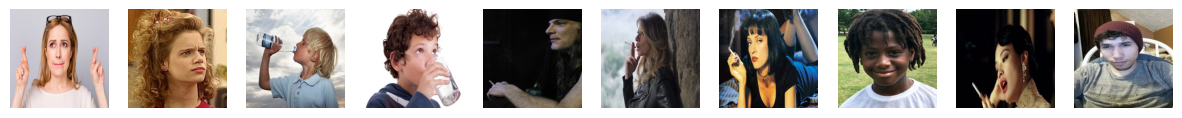

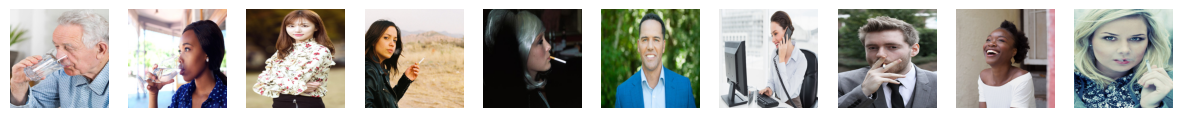

In [55]:
# Display a subset of the images
display(train[:20], 2)

In [56]:
CNN = Sequential()

CNN.add(Conv2D(64,(3,3),1,activation = 'relu',input_shape=(250,250,3)))
CNN.add(Conv2D(64,(3,3),1,activation = 'relu'))#,padding = 'same',kernel_regularizer = regularizers.l2(0.01)))
CNN.add(MaxPooling2D())
CNN.add(BatchNormalization())

CNN.add(Conv2D(128,(3,3),1,activation = 'relu',padding = 'same',kernel_regularizer = regularizers.l2(0.01)))
CNN.add(MaxPooling2D())
CNN.add(Dropout(0.3))
CNN.add(Conv2D(128,(3,3),1,activation = 'relu',padding = 'same',kernel_regularizer = regularizers.l2(0.01)))
CNN.add(MaxPooling2D())
CNN.add(BatchNormalization())

# Global Average Pooling
CNN.add(GlobalAveragePooling2D())

CNN.add(Flatten())
CNN.add(Dropout(0.2))
CNN.add(Dense(256,activation='relu',kernel_regularizer = regularizers.l2(0.01)))
CNN.add(BatchNormalization())
CNN.add(Dense(1, activation='sigmoid'))

In [57]:
opt = tf.keras.optimizers.Adam(clipvalue = 0.5)
CNN.compile(
    optimizer=opt,  
    loss=tf.keras.losses.BinaryCrossentropy(),  
    metrics=['accuracy']  
)

In [58]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 123, 123, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 128)      0

In [59]:
hist = CNN.fit(train,y_train.reshape(-1,1),epochs = 150, validation_data=(val, y_val.reshape(-1,1)))

Epoch 1/150
23/23 [==============================] - 267s 11s/step - loss: 4.3370 - accuracy: 0.6760 - val_loss: 4.5209 - val_accuracy: 0.5389
Epoch 2/150
23/23 [==============================] - 303s 13s/step - loss: 3.6580 - accuracy: 0.7263 - val_loss: 3.9245 - val_accuracy: 0.5500
Epoch 3/150
23/23 [==============================] - 279s 12s/step - loss: 3.0636 - accuracy: 0.7039 - val_loss: 3.2186 - val_accuracy: 0.5722
Epoch 4/150
23/23 [==============================] - 252s 11s/step - loss: 2.5306 - accuracy: 0.7598 - val_loss: 2.4045 - val_accuracy: 0.6611
Epoch 5/150
23/23 [==============================] - 312s 14s/step - loss: 2.1740 - accuracy: 0.7277 - val_loss: 2.0780 - val_accuracy: 0.6222
Epoch 6/150
23/23 [==============================] - 293s 13s/step - loss: 1.9130 - accuracy: 0.7277 - val_loss: 2.0069 - val_accuracy: 0.6000
Epoch 7/150
23/23 [==============================] - 231s 10s/step - loss: 1.6726 - accuracy: 0.7318 - val_loss: 1.6844 - val_accuracy: 0.6111

KeyboardInterrupt: 